In [14]:
##required python libraries installed
import pandas as pd
import numpy as np
import scipy as scipy
import matplotlib as plt


In [23]:
import pandas as pd

# Loading dataset
file_path = "FEV-data-Excel.xlsx"  
df = pd.read_excel(file_path)

# Displaying the first few rows
print(df.head())

# Checking the missing values
print(df.info())


                      Car full name  Make                        Model  \
0            Audi e-tron 55 quattro  Audi            e-tron 55 quattro   
1            Audi e-tron 50 quattro  Audi            e-tron 50 quattro   
2             Audi e-tron S quattro  Audi             e-tron S quattro   
3  Audi e-tron Sportback 50 quattro  Audi  e-tron Sportback 50 quattro   
4  Audi e-tron Sportback 55 quattro  Audi  e-tron Sportback 55 quattro   

   Minimal price (gross) [PLN]  Engine power [KM]  Maximum torque [Nm]  \
0                       345700                360                  664   
1                       308400                313                  540   
2                       414900                503                  973   
3                       319700                313                  540   
4                       357000                360                  664   

        Type of brakes Drive type  Battery capacity [kWh]  Range (WLTP) [km]  \
0  disc (front + rear)        

In [25]:
# Task1 partA: Filter the EVs
filtered_evs = df[(df['Minimal price (gross) [PLN]'] <= 350000) & (df['Range (WLTP) [km]'] >= 400)]

# Task1 partB: Grouping by manufacturer of EVs
grouped_by_make = filtered_evs.groupby('Make')

# Task1 partC: Calculating average battery capacity
avg_battery_capacity = grouped_by_make['Battery capacity [kWh]'].mean()

print("Filtered EVs:")
print(filtered_evs[['Make', 'Model', 'Range (WLTP) [km]', 'Minimal price (gross) [PLN]']])
print("\nAverage Battery Capacity by Manufacturer:")
print(avg_battery_capacity)


Filtered EVs:
             Make                        Model  Range (WLTP) [km]  \
0            Audi            e-tron 55 quattro                438   
8             BMW                          iX3                460   
15        Hyundai          Kona electric 64kWh                449   
18            Kia                 e-Niro 64kWh                455   
20            Kia                 e-Soul 64kWh                452   
22  Mercedes-Benz                          EQC                414   
39          Tesla  Model 3 Standard Range Plus                430   
40          Tesla           Model 3 Long Range                580   
41          Tesla          Model 3 Performance                567   
47     Volkswagen         ID.3 Pro Performance                425   
48     Volkswagen                   ID.3 Pro S                549   
49     Volkswagen                     ID.4 1st                500   

    Minimal price (gross) [PLN]  
0                        345700  
8                   

In [13]:
##TASK2 finding outliers in the mean energy consumption column[kwh/100]
import pandas as pd

# Specifying the file
file_path = "FEV-data-Excel.xlsx" 

# Loading the dataset
try:
    df = pd.read_excel(file_path, engine='openpyxl')  
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

# Displaying first few rows of  dataset
print(df.head())

# Display the column names
print(df.columns)

#finding outliers in the mean energy consumption column[kwh/100]
from scipy.stats import zscore

# Strip some extra spaces from column names
df.columns = df.columns.str.strip()

# Ensuring that the column exists
if 'Mean - Energy consumption [kWh/100 km]' in df.columns:
    # Step 1: Calculate Z-scores
    df['Z-Score'] = zscore(df['Mean - Energy consumption [kWh/100 km]'])

    # Step 2: Define threshold for outliers (e.g., |Z| > 3.0)
    threshold = 3
    outliers = df[(df['Z-Score'].abs() > threshold)]

    # Displaying the Results
    print(f"Number of Outliers: {outliers.shape[0]}")
    print("Outliers based on Z-scores:")
    print(outliers[['Car full name', 'Mean - Energy consumption [kWh/100 km]', 'Z-Score']])

    # Remove the Z-Score column (optional)
    df.drop(columns=['Z-Score'], inplace=True)
else:
    print("Error: 'Mean - Energy consumption [kWh/100 km]' column not found in the dataset.")

print(df.columns)




Dataset loaded successfully!
                      Car full name  Make                        Model  \
0            Audi e-tron 55 quattro  Audi            e-tron 55 quattro   
1            Audi e-tron 50 quattro  Audi            e-tron 50 quattro   
2             Audi e-tron S quattro  Audi             e-tron S quattro   
3  Audi e-tron Sportback 50 quattro  Audi  e-tron Sportback 50 quattro   
4  Audi e-tron Sportback 55 quattro  Audi  e-tron Sportback 55 quattro   

   Minimal price (gross) [PLN]  Engine power [KM]  Maximum torque [Nm]  \
0                       345700                360                  664   
1                       308400                313                  540   
2                       414900                503                  973   
3                       319700                313                  540   
4                       357000                360                  664   

        Type of brakes Drive type  Battery capacity [kWh]  Range (WLTP) [km]  \
0

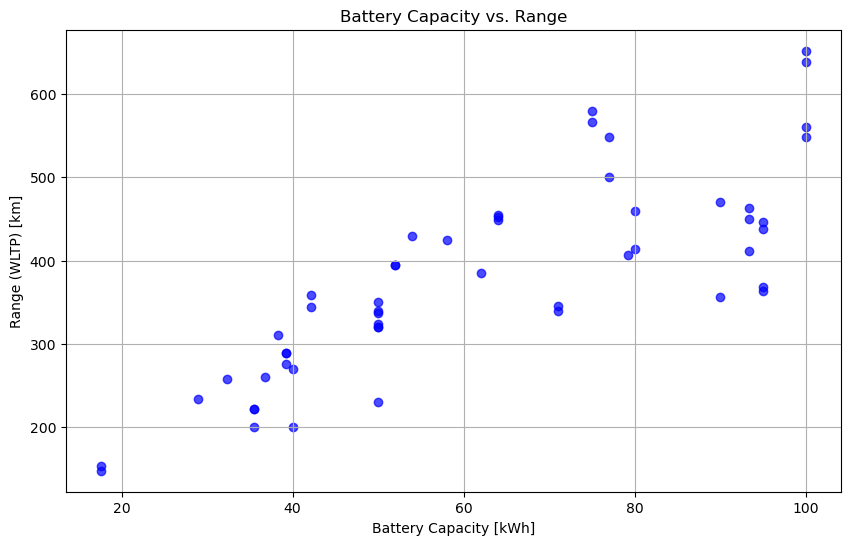

Correlation between battery capacity and range: 0.8104385771936846


In [30]:
TASK 3 #suitable plot to visualize strong relationship between battery capacity and range
import matplotlib.pyplot as plt

# Scatter plot for visualization
plt.figure(figsize=(10, 6))
plt.scatter(df['Battery capacity [kWh]'], df['Range (WLTP) [km]'], alpha=0.7, color='blue')
plt.title('Battery Capacity vs. Range')
plt.xlabel('Battery Capacity [kWh]')
plt.ylabel('Range (WLTP) [km]')
plt.grid()
plt.show()

# highlighting insights
correlation = df['Battery capacity [kWh]'].corr(df['Range (WLTP) [km]'])
print(f"Correlation between battery capacity and range: {correlation}")


In [32]:
TASK4 #buiding an EV recommendation class
class EVRecommendation:
    def __init__(self, data):
        self.data = data

    def recommend(self, budget, min_range, min_battery_capacity):
        recommendations = self.data[
            (self.data['Minimal price (gross) [PLN]'] <= budget) &
            (self.data['Range (WLTP) [km]'] >= min_range) &
            (self.data['Battery capacity [kWh]'] >= min_battery_capacity)
        ]
        return recommendations.nlargest(3, 'Range (WLTP) [km]')

# Instantiate the class for EV recommendation
ev_recommender = EVRecommendation(df)

# Example usage for EV recommendation
top_evs = ev_recommender.recommend(350000, 400, 60)
print("Top 3 EV Recommendations:")
print(top_evs[['Make', 'Model', 'Range (WLTP) [km]', 'Minimal price (gross) [PLN]']])


Top 3 EV Recommendations:
          Make                Model  Range (WLTP) [km]  \
40       Tesla   Model 3 Long Range                580   
41       Tesla  Model 3 Performance                567   
48  Volkswagen           ID.3 Pro S                549   

    Minimal price (gross) [PLN]  
40                       235490  
41                       260490  
48                       179990  


In [34]:
TASK 5 # conducting a two sample t-test using ttest_ind from scipy.stats module
from scipy.stats import ttest_ind

# Filtering the Tesla and Audi data
tesla_power = df[df['Make'] == 'Tesla']['Engine power [KM]']
audi_power = df[df['Make'] == 'Audi']['Engine power [KM]']

# Performing two-sample t-test
t_stat, p_value = ttest_ind(tesla_power, audi_power, equal_var=False)

print("T-Test Results:")
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in average engine power between Tesla and Audi.")
else:
    print("No significant difference in average engine power between Tesla and Audi.")


T-Test Results:
T-Statistic: 1.7939951827297178, P-Value: 0.10684105068839565
No significant difference in average engine power between Tesla and Audi.
